# <p style="text-align: center;">MIS 382N: Advanced Predictive Modeling</p>
# <p style="text-align: center;">Assignment 4</p>
## <p style="text-align: center;">Total points: 50 </p>
## <p style="text-align: center;">Due: Mon, November 14</p>



Your homework should be written in a **Jupyter notebook**. Please submit **only one** ipynb file from each group, and include the names of all the group members. Also, please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting.

In [1]:
import pandas as pd
% pylab inline
import seaborn as sns
import numpy as np

Populating the interactive namespace from numpy and matplotlib


# Problem 1 - MNIST (15 pts)
In this question you classify hand-written digits. We want to use MNIST data set and try Multi-layer Perceptron (MLP) classifier using sklearn package in Python. In order to simplify the problem, we classify digits into 8 classes (digits 0,1,2,...7) and ignore records for digits 8 and 9.  Use the code below to access the data set and extract data with labels 0 to 7, and split the data set into train set and test set.

1. Fit a Multilayer Perceptron Classifier using the standard options on sklearn's MLP on train data. Report the root MSE for both train and test data. (5 pts)

    Use these parameters for your model: 
                    {hidden_layer_sizes=(50,), max_iter=10, alpha=1e-4,
                    solver='sgd', verbose=10, tol=1e-4, random_state=42,
                    learning_rate_init=.1}
                    
2. To find better parameters for the MLP Classifier model, try an exhaustive search over all parameters of the data. Use sklearn's GridSearchCV to find the best subset of parameters from the set:
                    { alpha = [0.1,0.01,0.001], activation : ['logistic', 'relu'] }
    which parameters resulted in a more accurate model? Can you explain why? (5 pts)

3. Select 5 misclassified images and display them. (5 pts)

In [15]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_mldata
from sklearn.model_selection import (train_test_split,KFold)
from sklearn.neural_network import MLPClassifier
from sklearn.grid_search import GridSearchCV

mnist = fetch_mldata("MNIST original")
# rescale the data, use the traditional train/test split
X = (mnist.data / 255.)[:48200]
y = mnist.target[:48200]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.1, random_state=42)

## 1. MLP with Standard Options

In [19]:
# Fit model
mlp = MLPClassifier(hidden_layer_sizes=(50,), max_iter=10, alpha=1e-4, solver='sgd', verbose=10, tol=1e-4, random_state=42,
                   learning_rate_init=.1)
mlp.fit(X_train, y_train)

# Get score
mlpTrain_score = mlp.score(X_train, y_train)
mlpTest_score = mlp.score(X_test, y_test)

Iteration 1, loss = 0.24522635
Iteration 2, loss = 0.10589741
Iteration 3, loss = 0.07488529
Iteration 4, loss = 0.05895084
Iteration 5, loss = 0.04782934
Iteration 6, loss = 0.03945315
Iteration 7, loss = 0.03320940
Iteration 8, loss = 0.02872414
Iteration 9, loss = 0.02451143
Iteration 10, loss = 0.02132893


In [20]:
print 'Score (Mean Accuracy):'
print '\tTraining (In-Sample)\t:\t{}'.format(mlpTrain_score)
print '\tTest (Out-of-Sample)\t:\t{}'.format(mlpTest_score)

Score (Mean Accuracy):
	Training (In-Sample)	:	0.995620101429
	Test (Out-of-Sample)	:	0.980290456432


## 2. Find Optimal Parameters

In [21]:
# Define parameters to search over
param_grid = {'alpha' : [0.1,0.01,0.001], 'activation' : ['logistic', 'relu']}

# Perform exhaustive search over parameters
gridSearch = GridSearchCV(mlp, param_grid)
gridSearch.fit(X_train, y_train)

Iteration 1, loss = 0.63780467
Iteration 2, loss = 0.26993412
Iteration 3, loss = 0.24531053
Iteration 4, loss = 0.23249797
Iteration 5, loss = 0.22329679
Iteration 6, loss = 0.21626242
Iteration 7, loss = 0.21060256
Iteration 8, loss = 0.20636226
Iteration 9, loss = 0.20275525
Iteration 10, loss = 0.19956171
Iteration 1, loss = 0.63829233
Iteration 2, loss = 0.27025643
Iteration 3, loss = 0.24654183
Iteration 4, loss = 0.23410992
Iteration 5, loss = 0.22552123
Iteration 6, loss = 0.21804481
Iteration 7, loss = 0.21292405
Iteration 8, loss = 0.20858724
Iteration 9, loss = 0.20470124
Iteration 10, loss = 0.20241500
Iteration 1, loss = 0.63081829
Iteration 2, loss = 0.26626237
Iteration 3, loss = 0.24312374
Iteration 4, loss = 0.22986850
Iteration 5, loss = 0.22091677
Iteration 6, loss = 0.21371822
Iteration 7, loss = 0.20887361
Iteration 8, loss = 0.20509427
Iteration 9, loss = 0.20130855
Iteration 10, loss = 0.19839854
Iteration 1, loss = 0.60657526
Iteration 2, loss = 0.22005063
Itera

GridSearchCV(cv=None, error_score='raise',
       estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(50,), learning_rate='constant',
       learning_rate_init=0.1, max_iter=10, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=42, shuffle=True,
       solver='sgd', tol=0.0001, validation_fraction=0.1, verbose=10,
       warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'alpha': [0.1, 0.01, 0.001], 'activation': ['logistic', 'relu']},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [27]:
print 'Best Parameters:'
print '\tBest Alpha\t:\t{}'.format(gridSearch.best_params_['alpha'])
print '\tBest Activation\t:\t{}'.format(gridSearch.best_params_['activation'])
print
print 'Associated Score\t:\t{}'.format(gridSearch.best_score_)

Best Parameters:
	Best Alpha	:	0.01
	Best Activation	:	relu

Associated Score	:	0.976947902259


Out of the parameters included in the search, the combination with the best accuracy is alpha=0.01 and activation='relu'. Alpha represents the L2 penalty (regularization term). The larger the alpha, the larger the penalty on the cost function and the more substantial the regularization. Activation represents the activation function for the hidden layer. The activation function determines the output of the layer given the inputs. The two options that we considered are logistic and relu. Logistic represents the logistic sigmoid function: $f(x) = \frac{1}{1+exp(-x)}$. Relu represents the rectified linear unit function: $f(x) = max(0,x)$.

## 3. Misclassified Images

In [28]:
# Fit MLP classifier with optimal parameters
MLP = MLPClassifier(hidden_layer_sizes=(50,), max_iter=10, alpha=0.01, activation='relu', solver='sgd', verbose=10, tol=1e-4, 
                    random_state=42, learning_rate_init=.1)
MLP.fit(X_train, y_train)

# Predict test set
mlp_predTest = MLP.predict(X_test)

Iteration 1, loss = 0.24919265
Iteration 2, loss = 0.11119727
Iteration 3, loss = 0.08101890
Iteration 4, loss = 0.06582402
Iteration 5, loss = 0.05551116
Iteration 6, loss = 0.04768295
Iteration 7, loss = 0.04212951
Iteration 8, loss = 0.03863674
Iteration 9, loss = 0.03435591
Iteration 10, loss = 0.03156028


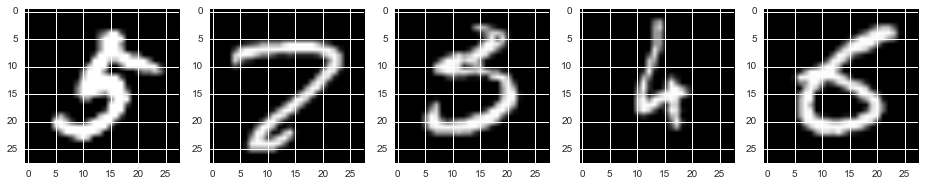

In [58]:
# Find misclassified images in test set
images = []
for i in range(len(y_test)):
    if y_test[i] != mlp_predTest[i]:
        images.append(X_test[i])

images = images[:5]

# Display misclassified images
figure(figsize=(16,4))

subplot(151)
plt.imshow(images[0].reshape(28,28), cmap='gray')

subplot(152)
plt.imshow(images[1].reshape(28,28), cmap='gray')

subplot(153)
plt.imshow(images[2].reshape(28,28), cmap='gray')

subplot(154)
plt.imshow(images[3].reshape(28,28), cmap='gray')

subplot(155)
plt.imshow(images[4].reshape(28,28), cmap='gray')

# Question 2: Regression Trees (10 points)

In this question, we will be exploring the application of regression tree (RT) using sklearn package in Python. You will be using the same Hitters.csv dataset (available on Canvas) used in HW2 Q5 to predict a baseball player’s Salary using all the 16 performance variables. Use a random state of 42 and a test size of 1/3 to split the data into training and test.

1. Build a regression using [DecisionTreeRegressor](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) with max_depth = 5. Report the mean squared errors on both training and test datasets. (4)
2. Repeat Part-1 with max_depth = 2. (4)
3. Briefly explain what you observe from these MSE values obtained by using maximum tree depths 5 and 2? Which tree is better and why? (2)

In [24]:
hitters = pd.read_csv("Hitters.csv")
hitters.head(1)

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
0,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10,475.0


In [25]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

train, test = train_test_split(hitters, test_size=0.33, random_state=42)
X_train = train.drop('Salary', axis=1)
X_test = test.drop('Salary', axis=1)
y_train = train['Salary']
y_test = test['Salary']

## 1. Max Depth = 5

In [26]:
# Fit model
dtr5 = DecisionTreeRegressor(max_depth=5)
dtr5.fit(X_train, y_train)

# Predict
dtr5_predTrain = dtr5.predict(X_train)
dtr5_predTest = dtr5.predict(X_test)

# Get MSE
MSE5_train = mean_squared_error(y_train, dtr5_predTrain)
MSE5_test = mean_squared_error(y_test, dtr5_predTest)

In [27]:
print 'Mean Squared Errors:'
print '\tTrain (In-Sample)\t:\t{:>9.2f}'.format(MSE5_train)
print '\tTest (Out-of-Sample)\t:\t{:>9.2f}'.format(MSE5_test)

Mean Squared Errors:
	Train (In-Sample)	:	 18843.55
	Test (Out-of-Sample)	:	214094.74


## 2. Max Depth = 2

In [28]:
# Fit model
dtr2 = DecisionTreeRegressor(max_depth=2)
dtr2.fit(X_train, y_train)

# Predict
dtr2_predTrain = dtr2.predict(X_train)
dtr2_predTest = dtr2.predict(X_test)

# Get MSE
MSE2_train = mean_squared_error(y_train, dtr2_predTrain)
MSE2_test = mean_squared_error(y_test, dtr2_predTest)

In [29]:
print 'Mean Squared Errors:'
print '\tTrain (In-Sample)\t:\t{:>9.2f}'.format(MSE2_train)
print '\tTest (Out-of-Sample)\t:\t{:>9.2f}'.format(MSE2_test)

Mean Squared Errors:
	Train (In-Sample)	:	 69521.97
	Test (Out-of-Sample)	:	168079.55


## 3. Observations

For both trees, the MSE on the training set is significantly better than the MSE on the test set. This is expected because decision trees have a tendency to overfit the training data. 

Comparing the two models, the tree with a max depth of 5 outperformed the tree with a max depth of 2 on the in-sample predictions. However, the shallower tree performed significantly better on the out-of-sample predictions. Increasing the max depth increases the complexity of the model, causing the tree to capture more of the nuances in the training data. In this case, the deeper tree clearly over-fit the training set, causing poor out-of-sample prediction. Therefore, the shallower tree (max depth of 2) is the more optimal choice.

There is a clear trade-off between bias and variance in these models. As you increase the max depth of the tree, variance increases and bias decreases. To maximize out-of-sample performance, it is important to find the optimal balance between the two. You can do this using cross validation, testing the model several times for different max depth values and choosing the model with the lowest out-of-sample MSE.

# Question 3 - Support Vector Regression vs. Linear Regression (10pts)
Download datasets 'summer_gpa_test.csv' and 'summer_gpa_train.csv' from Canvas. With this toy dataset, we want to predict GPA in Summer 2016 for students using 5 different features. So, target variable will be 'GPA_summer2016' in this problem.

1. Fit a support vector regression using the default options on [sklearn's SVR](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html) on training data. Note that the default kernel is "rbf".  Report the root MSE for both train and test data. (2)

2. Fit SVR with 'linear' kernel and Linear Regression (for other options, use default parameter settings). Report RMSE of prediction on train and test data for the two methods. (3)

3. Now, compare the results of three different methods, then provide a possible reason for SVR with RBF kernel not working well on test set. (1)

4.  Provide simple residual plots on Train and Test set for all three methods. Specifically, submit a scatter plot wherein y-axis shows the residuals and x-axis the predicted values. What can you learn about the effect of outliers on different models from this problem? (4)

In [2]:
import pandas as pd
import numpy as np
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

d_train = pd.read_csv('summer_gpa_train.csv',index_col='student')
d_test = pd.read_csv('summer_gpa_test.csv',index_col='student')

y_train = d_train['GPA_summer2016']
y_test = d_test['GPA_summer2016']
x_train = d_train.drop('GPA_summer2016',axis=1)
x_test = d_test.drop('GPA_summer2016',axis=1)

In [17]:
max(d_train['GPA_summer2016'])

4.0

## 1. Default SVR

In [4]:
# Fit model
svr = SVR()
svr.fit(x_train, y_train)

# Predict
svr_predTrain = svr.predict(x_train)
svr_predTest = svr.predict(x_test)

# Get RMSE
RMSE_train = np.sqrt(mean_squared_error(y_train, svr_predTrain))
RMSE_test = np.sqrt(mean_squared_error(y_test, svr_predTest))

In [5]:
print 'Root Mean Squared Error:'
print '\tTrain (In-Sample)\t:\t{}'.format(RMSE_train)
print '\tTest (Out-of-Sample)\t:\t{}'.format(RMSE_test)

Root Mean Squared Error:
	Train (In-Sample)	:	0.174703118961
	Test (Out-of-Sample)	:	0.549667753896


## 2. SVR with Linear Kernel and Linear Regression

In [6]:
# Fit models
svrLin = SVR(kernel='linear')
svrLin.fit(x_train, y_train)

linReg = LinearRegression()
linReg.fit(x_train, y_train)

# Predict
svrLin_predTrain = svrLin.predict(x_train)
svrLin_predTest = svrLin.predict(x_test)

linReg_predTrain = linReg.predict(x_train)
linReg_predTest = linReg.predict(x_test)

# Get RMSE
RMSE_svrTrain = np.sqrt(mean_squared_error(y_train, svrLin_predTrain))
RMSE_svrTest = np.sqrt(mean_squared_error(y_test, svrLin_predTest))

RMSE_lrTrain = np.sqrt(mean_squared_error(y_train, linReg_predTrain))
RMSE_lrTest = np.sqrt(mean_squared_error(y_test, linReg_predTest))

In [7]:
print 'RMSE on Training Data:'
print '\tSVR\t\t\t:\t{}'.format(RMSE_svrTrain)
print '\tLinear Regression\t:\t{}'.format(RMSE_lrTrain)
print
print 'RMSE on Test Data:'
print '\tSVR\t\t\t:\t{}'.format(RMSE_svrTest)
print '\tLinear Regression\t:\t{}'.format(RMSE_lrTest)

RMSE on Training Data:
	SVR			:	0.477967720085
	Linear Regression	:	0.458060629343

RMSE on Test Data:
	SVR			:	0.231968041522
	Linear Regression	:	0.260057137391


## 3. Compare Results

Looking at the test root mean squared error for the different models, we see that SVR with a linear kernel function performed the best (lowest RMSE) of the three on out-of-sample predictions. Linear regression performed only slightly worse. With an RMSE more than twice as high as that of the other two models, SVR with RBF (Radial Basis Function) kernel function showed the worst performance by a significant margin.

However, if we examine the training root mean square errors, we see that the exact opposite is true with regards to in-sample predictions. SVR with RBF kernel performs significantly better than the other two models. This leads me to believe that SVR with an RBF kernel is over-fitting the training data. 

## 4. Residuals

In [23]:
# Training Residuals
svr_resTrain = y_train - svr_predTrain
svrLin_resTrain = y_train - svrLin_predTrain
linReg_resTrain = y_train - linReg_predTrain

# Test Residuals
svr_resTest = y_test - svr_predTest
svrLin_resTest = y_test - svrLin_predTest
linReg_resTest = y_test - linReg_predTest

(-1.5, 3)

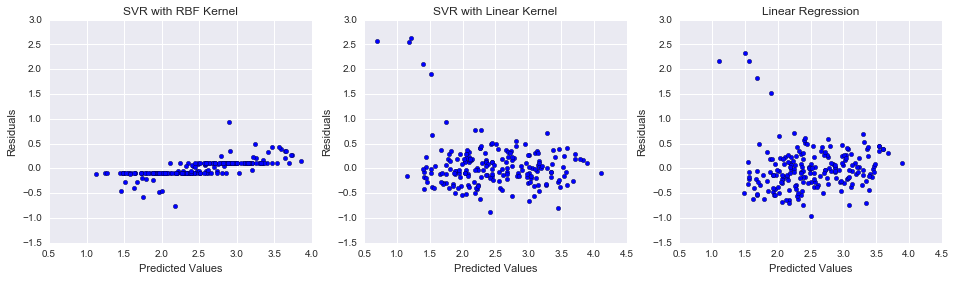

In [26]:
# Plot training residuals
figure(figsize=(16,4))

subplot(131)
scatter(svr_predTrain, svr_resTrain)
xlabel('Predicted Values')
ylabel('Residuals')
title('SVR with RBF Kernel')
ylim(-1.5,3)

subplot(132)
scatter(svrLin_predTrain, svrLin_resTrain)
xlabel('Predicted Values')
ylabel('Residuals')
title('SVR with Linear Kernel')
ylim(-1.5,3)

subplot(133)
scatter(linReg_predTrain, linReg_resTrain)
xlabel('Predicted Values')
ylabel('Residuals')
title('Linear Regression')
ylim(-1.5,3)

(-1.5, 1.5)

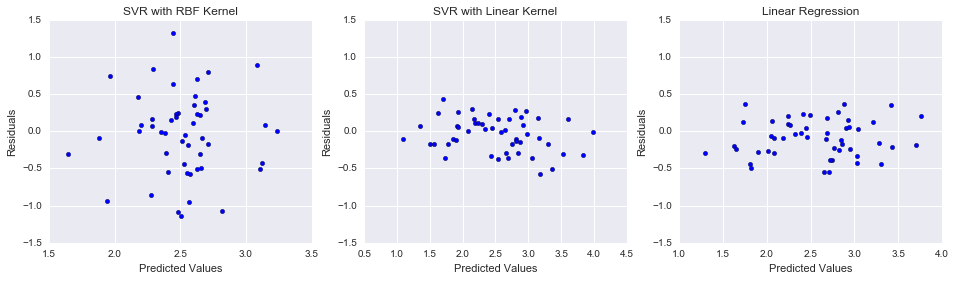

In [27]:
# Plot test residuals
figure(figsize = (16,4))

subplot(131)
scatter(svr_predTest, svr_resTest)
xlabel('Predicted Values')
ylabel('Residuals')
title('SVR with RBF Kernel')
ylim(-1.5,1.5)

subplot(132)
scatter(svrLin_predTest, svrLin_resTest)
xlabel('Predicted Values')
ylabel('Residuals')
title('SVR with Linear Kernel')
ylim(-1.5,1.5)

subplot(133)
scatter(linReg_predTest, linReg_resTest)
xlabel('Predicted Values')
ylabel('Residuals')
title('Linear Regression')
ylim(-1.5,1.5)

### Observations

Looking at the residual plots for the training data, we see a stark difference between the SVR with RBF and the other two models. For the two linear models, there are several samples that were predicted to have very low GPAs, but that actually had very high GPAs. This is not the case for SVR with RBF kernel, where residuals across the board are much lower for the training data.

However, if we examine the residual plots for the test set, we see that residuals are typically lower for the two linear functions than for SVR with RBF. This leads me to believe that the points mentioned previously are outliers and that SVR with RBF over-fit to accomodate for these outliers. This model was likely chasing noise in the training set that did not have any out-of-sample predictive power. This caused it to perform more poorly in predicting the test set than the two linear models that appear to be more robust to outliers.

# Question 4: Bayesian Networks (10 pts)
#### Part (a) (5 points)
Consider the following Bayesian network of binary (True/False) variables.

<img src="hw4q4pic1.png">

This is equivalent to saying that X and Y are conditionally independent given C, or P(X,Y|C) = P(X|C)P(Y|C). This happens to be the assumption used by the Naive Bayes classifier.

The exact probabilities are given:  
P(X = True | C = True) = .75  
P(X = True | C = False) = .5  
P(Y = True | C = True) = .25  
P(Y = True | C = False) = .5  
P(C = True) = .5

Find P(C = True | X = True, Y = True). The easiest method is to use Bayes rule, along with the conditional independence equation given above.

#### (b) (5 points)
A new feature Z is added, and based on prior knowledge, we believe that one of the two networks given below properly captures the dependencies among the variables. Our goal is to determine P(C|X,Y,Z). For each of these two different networks:

<img src="hw4q4pic2.png">

will P(C|X,Y,Z) be the same as P(C|X,Y) (the inference from part a)? Or will it be different? Give a separate answer for each network.

# Question 5: Mulitclass Classification (5 points)

One way of using a binary classifier for addressing a multiclass classification problem is to use a One-vs.-All (or One-vs.-Rest)  strategy.

1. Briefly describe the  One-vs.-All method.  (2pts)

2. What are two disadvantages of using the One-vs.-All method in situations where the number of classes $N$ is very large? (3pts)

## 1. One-vs.-All Method

The One-vs.-All method is a way to apply a binary classifier to a multiclass model. It works by fitting a single binary classifier to each class. In each classifier, the samples of one class are considered positive, and the samples of all other classes are considered negative. Each model can then assign a probability to each individual data point that it belongs to the model's positive class. Class predictions are made by assigning points to the class whose model produced the highest probability.

## 2. Disadvantages

1. When the number of classes $N$ is very large, the One-vs.-All method can be very expensive computationally. When training, the method requires fitting a separate binary classifier for each class. When predicting, each classifier must assign a probability to each data point. Naturally, the more classes that there are, the more expensive the computations are in both training and predicting.

2. Even if the distribution is very balanced among all of the classes, if $N$ is very large, each binary classifier sees a very unbalanced distribution. There will be significantly more negative samples than positive samples for each model to train on, making it difficult for the model to separate the positive class.